# Train-the-Trainer Hands-on Workshop: Maschinelles Lernen & Deep Learning 🤖 
Benjamin Bergner, Stefan Konigorski, Matthias Kirchler (Hasso Plattner Institut)
20. November 2020

Willkommen zum Praxis-Workshop Maschinelles Lernen und Deep Learning. Wir werden heute mehrere Algorithmen an verschiedenen Datensätzen ausprobieren und dabei mehrere Softwarebibliotheken kennenlernen - darunter scikit-learn, pandas, numpy & fast.ai. Nach diesem Workshop sind Sie in der Lage sich weiter praktisch zu vertiefen und diese Algorithmen an eigenen Datensätzen auszuprobieren.

## Agenda

<a name="Agenda"></a>

| Inhalt | Zeit |
| :--- | :---: |
| Einführung | 10:00 - 10:15 |
| 1) Einführung in Machine Learning mit scikit-learn | 10:15 - 11:00|
|  a) Klassische Vorhersagemodelle | |
|  b) Unüberwachtes Lernen mit Clusteranalyse & PCA | |
| Übungen in scikit-learn in Kleingruppen | 11:00 - 11:30|
| Besprechung der Ergebnisse | 11:30 - 11:45|
| Pause | 11:45 - 12:15|
| 2) Einführung in Deep Learning mit fast.ai | 12:15 - 13:00|
| Projektarbeit in fast.ai - Kleingruppen | 13:00 - 13:30|
| Besprechung der Ergebnisse | 13:30 - 13:45|
| Abschluss | 13:45 - 14:00|

## Scikit-learn
<img style="float: left;" src="https://upload.wikimedia.org/wikipedia/commons/0/05/Scikit_learn_logo_small.svg">
Scikit-learn ist eine Software-Bibliothek für die Programmiersprache Python. Sie implementiert viele klassische Machine Learning Algorithmen, die wir im Webinar behandelt haben. Weiterhin erlaubt sie die Einbindung klassischer Datensätze, Datenvorverarbeitung, und Evaluierung dieser Algorithmen.

# Neuer Abschnitt

In [1]:
# Dies ist ein Kommentar, der nicht ausgeführt wird.
# Wir binden scikit-learn wie folgt ein:
import sklearn

<img src=https://i.ibb.co/169DD6d/scikit-learn.png width="750">

In [2]:
# Wir binden weitere Bibliotheken ein, die wir im weiteren Verlauf nutzen werden
import numpy as np
import pandas as pd
import seaborn as sns

# a) Maschinelles Lernen - Klassische Vorhersagemodelle

<hr>

## Ziel

Entwicklung eines Vorhersagemodells für Diabeteserkrankung
<hr>

## Methoden

- Logistische Regression
- Nächste-Nachbarn Klassifikation (k nearest neighbors)

Zusätzlich in der Übung:
- Entscheidungsbäume (decision trees) und Zufallsbäume (random forests)

<hr>

## Laden des Pima Diabetes Datensatzes

In [3]:
# Lade den Datensatz aus einer csv Datei.
# Quelle & Beschreibung des Datensatzes: https://www.kaggle.com/uciml/pima-indians-diabetes-database
dataset_url = "https://raw.githubusercontent.com/benjaminbergner/colab/main/Pima_diabetes.csv"
diabetes_df = pd.read_csv(dataset_url)
diabetes_df

,Schwangerschaften,Glukosespiegel,Blutdruck,Hautdicke,Insulin,BMI,DiabetesFamiliengeschichte,Alter,Diabetes
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
387,0,181,88,44,510,43.3,0.222,26,1
388,1,128,88,39,110,36.5,1.057,37,1
389,2,88,58,26,16,28.4,0.766,22,0
390,10,101,76,48,180,32.9,0.171,63,0


<hr>

## Überprüfen des Datensatzes

Dieser Datensatz wurde zuvor schon von uns bereinigt. Dies bedeutet im Speziellen, dass wir alle Beobachtungen entfernt haben, die einen Glukosewert, Blutdruck oder Insulinwert von 0 haben. Daher können wir diesen Schritt hier überspringen (für Details, siehe letzter Workshop zu "Daten").

Ziel: Vorhersage von Diabetesstatus: 0 = gesund, 1 = Diagnose von Typ 2 Diabetes

Schauen wir uns die Daten einmal etwas genauer an:

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Schwangerschaften           392 non-null    int64  
 1   Glukosespiegel              392 non-null    int64  
 2   Blutdruck                   392 non-null    int64  
 3   Hautdicke                   392 non-null    int64  
 4   Insulin                     392 non-null    int64  
 5   BMI                         392 non-null    float64
 6   DiabetesFamiliengeschichte  392 non-null    float64
 7   Alter                       392 non-null    int64  
 8   Diabetes                    392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 27.7 KB


Übersicht des Datensatzes: Deskriptive Statistiken

In [ ]:
diabetes_df.describe()

,Schwangerschaften,Glukosespiegel,Blutdruck,Hautdicke,Insulin,BMI,DiabetesFamiliengeschichte,Alter,Diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Betrachte die Verteilung der Variablen:

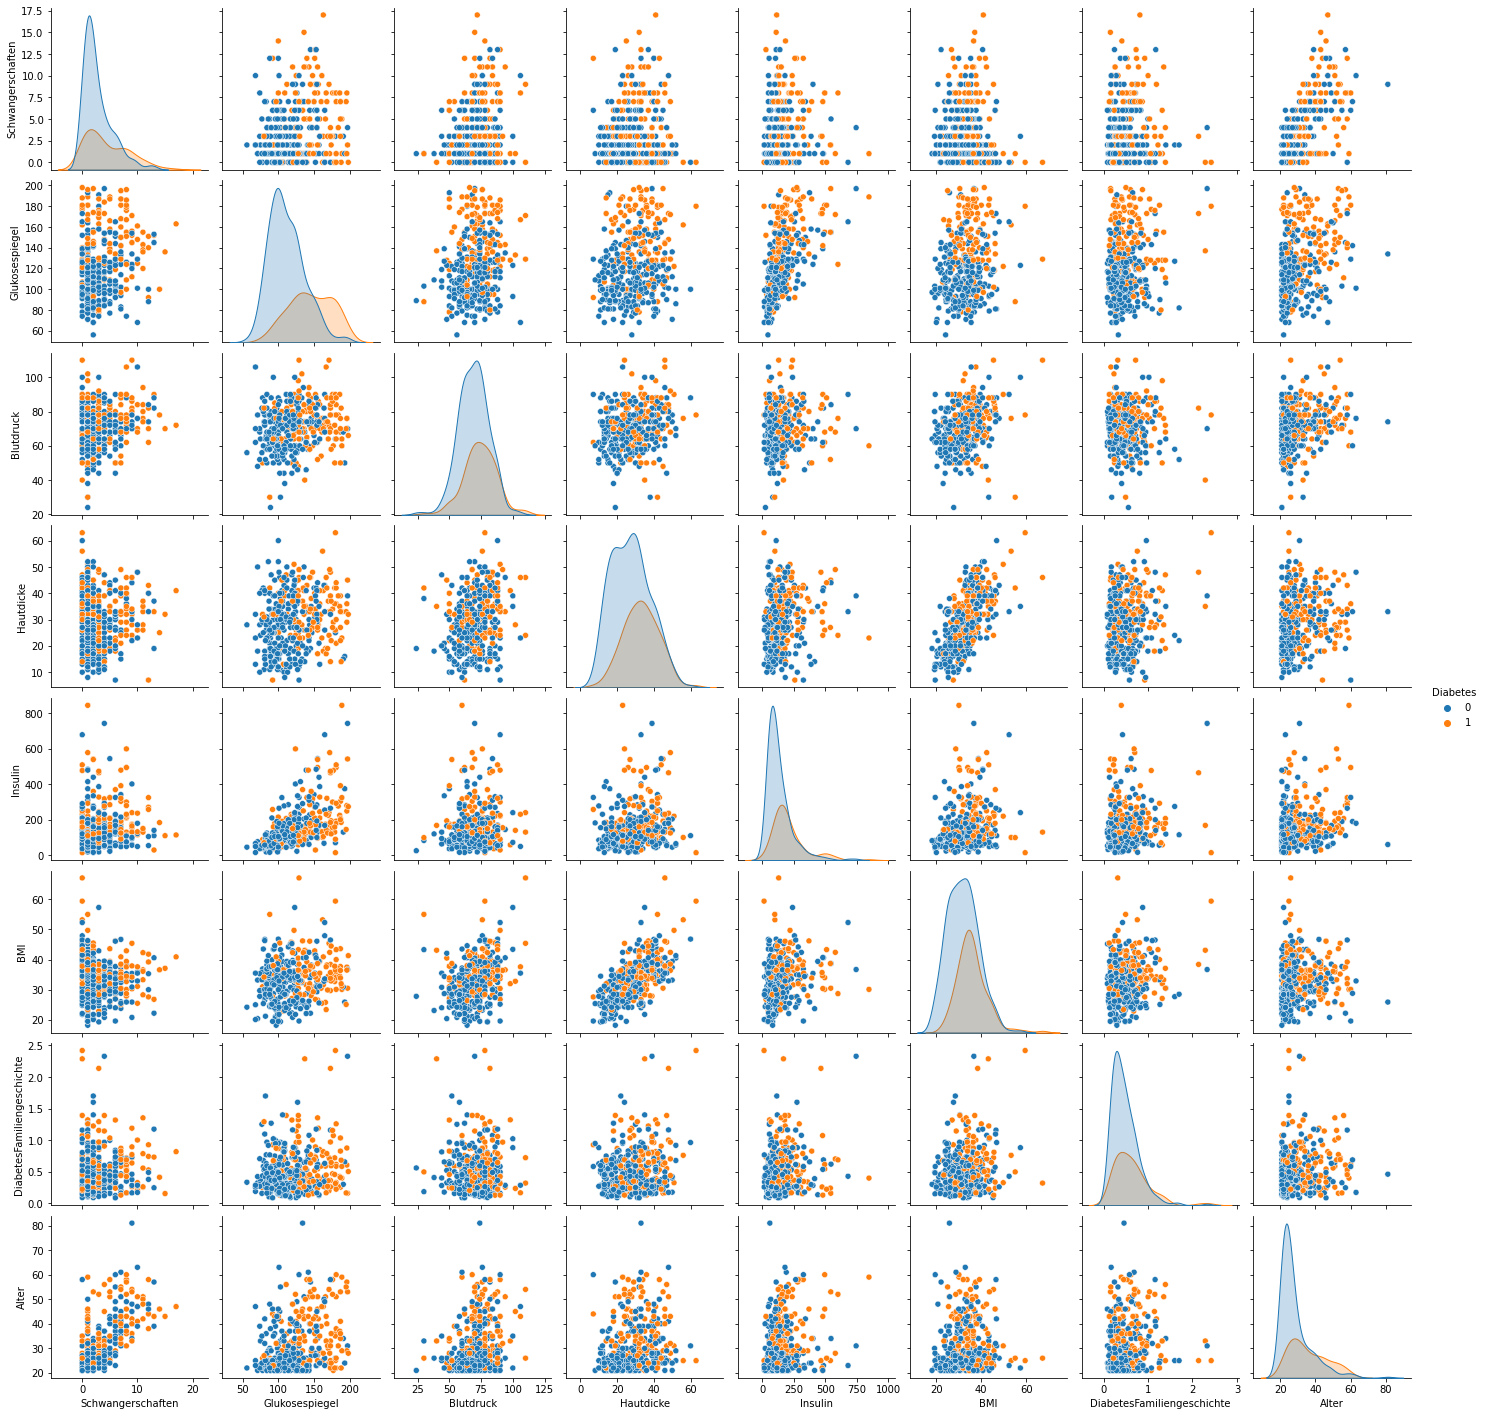

In [ ]:
sns.pairplot(diabetes_df, hue='Diabetes')

Wieviele Diabeteserkrankungen gibt es?

In [ ]:
pd.crosstab(index=diabetes_df['Diabetes'], columns="count")

col_0,count
Diabetes,
0,262
1,130


In [ ]:
dataset_size = diabetes_df['Diabetes'].size
print("Datensatzgröße: ", dataset_size)
print("Anteil Diabetes: ", diabetes_df['Diabetes'].sum() / dataset_size)

Datensatzgröße:  392
Anteil Diabetes:  0.33163265306122447


<hr>

## Logistische Regression 

<img src=https://eight2late.files.wordpress.com/2016/12/svm-fig-1.png width="500">

Wir betrachten zunächst ein Regressionsmodell (siehe auch Webinar Maschinelles Lernen). Dies sagt Diabetes durch eine Linearkombination von bestimmten Variablen vorher, die wir auswählen können. Welche Variablen? Wir können viele nehmen, oder wenige nehmen. Dies ist eine wichtige Frage und eigener Forschungsbereich (Modellselektion), und es gibt verschiedene Ansätze, relevante Variablen auszuwählen, z.B. nach inhaltlichen Kriterien ("sind die Variablen relevant für Diabetes?") oder statistischen Kriterien ("sagt mir mein statistisches Modell, dass sie relevant sind für die Vorhersage von Diabetes"). 

In unserem Fall wollen wir alle zur Verfügung stehenden Variablen zur Vorhersage nutzen - d.h. wir nehmen an, dass sich Diabetes durch eine Linearkombination dieser Variablen vorhersagen lässt.
<hr>

## Erstellung von Trainings- und Testdaten



Generiere Trainings- und Testdaten im 70/30 Split:

In [ ]:
y = diabetes_df.Diabetes
x = diabetes_df.drop('Diabetes', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)
x_train.head()

,Schwangerschaften,Glukosespiegel,Blutdruck,Hautdicke,Insulin,BMI,DiabetesFamiliengeschichte,Alter
44,1,122,90,51,220,49.7,0.325,31
334,1,117,60,23,106,33.8,0.466,27
224,4,117,64,27,120,33.2,0.230,24
355,2,121,70,32,95,39.1,0.886,23
11,10,125,70,26,115,31.1,0.205,41


In [ ]:
print("Größe x_train: ", x_train.shape)
print("Größe x_test: ", x_test.shape)

Größe x_train:  (274, 8)
Größe x_test:  (118, 8)


<hr>

## Baseline

Wie gut können wir Diabetes vorhersagen, nur durch Raten? Die höchste Genauigkeit (Accuracy) können wir erhalten, wenn wir bei jeder Person raten, dass sie nicht an Diabetes erkrankt ist. 

In [ ]:
pd.crosstab(index=y_test, columns="Count")

col_0,Count
Diabetes,
0,82
1,36


In [ ]:
82/118

0.6949152542372882

Damit werden wir bei gut 69% aller Frauen richtig liegen.

<hr>

## Weiter gehts mit logistischer Regression

Im Folgenden erstellen wir 3 Regressionsmodelle. Eines, das nur das Alter für das Training einbezieht, ein weiteres, das lediglich den BMI nutzt, und ein letztes, das alle Attribute einsetzt.

In [ ]:
Alter_train = x_train.Alter.values.reshape(-1,1)
BMI_train = x_train.BMI.values.reshape(-1,1)

Jedes Modell in scikit-learn wird zuerst importiert. Danach kann ein entsprechendes Objekt des Algorithmus erstellt und mit `fit` trainiert werden. Wir tun dies für alle 3 Experimente wie folgt:

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_alter = LogisticRegression(max_iter=1000)
logreg_bmi = LogisticRegression(max_iter=1000)
logreg_alle = LogisticRegression(max_iter=1000)

In [ ]:
logreg_alter.fit(Alter_train, y_train)
logreg_bmi.fit(BMI_train, y_train)
logreg_alle.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Da unsere 3 Modelle fertig trainiert sind, können wir diese auf den entsprechenden Testdaten anwenden und Vorhersagen treffen.

In [ ]:
Alter_test = x_test.Alter.values.reshape(-1,1)
BMI_test = x_test.BMI.values.reshape(-1,1)

In [ ]:
logreg_alter_pred = logreg_alter.predict(Alter_test)
logreg_bmi_pred = logreg_bmi.predict(BMI_test)
logreg_alle_pred = logreg_alle.predict(x_test)

Die Vorhersagen sind in den obigen Variablen gespeichert. Diese nutzen wir nun, um die Vorhersagequalität zu berechnen.

In [ ]:
pd.crosstab(y_test, logreg_alter_pred)

col_0,0,1
Diabetes,,
0,77,5
1,25,11


In [ ]:
print("Genauigkeit: ", logreg_alter.score(Alter_test, y_test))

Genauigkeit:  0.7457627118644068


In [ ]:
pd.crosstab(y_test, logreg_bmi_pred)

col_0,0,1
Diabetes,,
0,75,7
1,29,7


In [ ]:
print("Genauigkeit: ", logreg_bmi.score(BMI_test, y_test))

Genauigkeit:  0.6949152542372882


In [ ]:
pd.crosstab(y_test, logreg_alle_pred)

col_0,0,1
Diabetes,,
0,76,6
1,17,19


In [ ]:
print("Genauigkeit: ", logreg_alle.score(x_test, y_test))

Genauigkeit:  0.8050847457627118


Genauigkeiten: 75%, 69%, 81%. Das heißt immerhin im schlechtesten Fall so gut wie raten.

Was ist der Vorteil der Regression als Vorhersagemodell? Das Modell ist einfach verständlich und interpretierbar, und oft ein intuitiver und guter Startpunkt zur Vorhersage. Durch die Regressionskoeffizienten kann man klar sehen, welche Variablen welchen Einfluss in der Vorhersage haben, und ob sie als wichtig eingeschätzt werden. Hier ist auch eine Visualierung des Zusammenhangs der Variablen mit Diabetes:

In [ ]:
logreg_alle_pred_p = logreg_alle.predict_proba(x_test)[:,1]

[Text(0, 0.5, 'Wahrscheinlichkeit einer Diabeteserkrankung'),
 Text(0.5, 0, 'Glukosespiegel')]

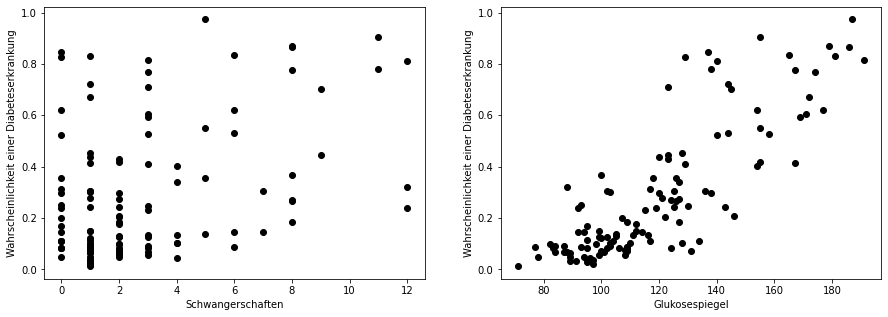

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].plot(x_test.Schwangerschaften, logreg_alle_pred_p, 'o', color='black')
axs[0].set(xlabel='Schwangerschaften', ylabel='Wahrscheinlichkeit einer Diabeteserkrankung')
axs[1].plot(x_test.Glukosespiegel, logreg_alle_pred_p, 'o', color='black')
axs[1].set(xlabel='Glukosespiegel', ylabel='Wahrscheinlichkeit einer Diabeteserkrankung')

<hr>

### Was ist noch wichtig? 
Die Regression macht verschiedene Annahmen, z.B. dass alle relevanten Variablen im Modell sind, und dass der Zusammenhang linear ist. Wenn das nicht der Fall ist, kann die Regressionsgerade und der geschätzte Zusammenhang der einzelnen Variablen verzerrt sein.

<hr>

## Nächste-Nachbarn Klassifikation (k-Nearest Neighbours) 

<img src=https://upload.wikimedia.org/wikipedia/de/thumb/8/8b/KNNClass.svg/1200px-KNNClass.svg.png width="500">

Vorgehen: Wir schauen, welche k Personen am Ähnlichsten zu einer ausgewählten Person sind, und überprüfen ob die Mehrheit Diabetes hat oder nicht. Die Ähnlichkeit wird hierbei auf Grundlage der 8 vorhandenen Variablen (d.h. im 8-dimensionalen Raum) berechnet. k ist die Anzahl an Nachbarn, die man einbeziehen möchte.

Bevor dieser Algorithmus jedoch verwendet werden kann, müssen die Daten normalisiert werden, um die Variablen auf die gleiche Skala zu bringen. Ohne diesen Schritt könnten manche Variablen das Ähnlichkeitsmaß zu stark dominieren.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train.values)
x_test_norm = scaler.transform(x_test.values)

Wie man nachfolgend sieht, ist die Vorgehensweise für all diese Algorithmen ähnlich. Es wird ein Objekt des jeweiligen Algorithmus erstellt und trainiert. Darauffolgend wird das Modell zur Vorhersage genutzt.

In [ ]:
# Vorhersagen
from sklearn.neighbors import KNeighborsClassifier

# Lege das Modell fest
knn_5 = KNeighborsClassifier(n_neighbors=5) # Wir betrachten die 5 nächsten Nachbarn

# Trainiere das Modell
knn_5.fit(x_train_norm, y_train)

# Sage mit dem Modell vorher
knn_5_predict = knn_5.predict(x_test_norm)

knn_5_predict

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
print("Genauigkeit: ", knn_5.score(x_test_norm, y_test))

Genauigkeit:  0.7966101694915254


Wir probieren weitere Varianten von k, um den optimalen Wert zu finden.

In [ ]:
# mit k=1 Nachbar
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(x_train_norm, y_train)
print("Genauigkeit: ", knn_1.score(x_test_norm, y_test))

Genauigkeit:  0.7288135593220338


In [ ]:
# mit k=3 Nachbarn
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(x_train_norm, y_train)
print("Genauigkeit: ", knn_3.score(x_test_norm, y_test))

Genauigkeit:  0.7711864406779662


In [ ]:
# mit k=10 Nachbarn
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(x_train_norm, y_train)
print("Genauigkeit: ", knn_10.score(x_test_norm, y_test))

Genauigkeit:  0.7711864406779662


Genauigkeiten: 80%, 77%, 82%, 82%. D.h. wenn man die richtige Anzahl von Nachbarn gut trifft, ist dieser Algorithmus in unserem Fall etwas besser als die logistische Regression.

# b) Maschinelles Lernen - Unüberwachtes Lernen mit Clusteranalyse & PCA

<hr>

## Ziel

Entwicklung von Clustering Modellen für Diabetesdatensatz
<hr>

## Methoden

- K-Means Clustering
- Principal Components Analysis (PCA)
- Hierarchisches (Agglomeratives) Clustering

<hr>

## K-Means Clustering
1. Zufällige Wahl von K Cluster-Zentren
2. Zuordnung aller Datenpunkte zum nächstgelegenen Cluster-Zentrum
3. Neuberechnung der Cluster-Zentren als Mittel aller zugeordneten Datenpunkte
4. Wiederholung von Schritt 2 und 3, bis sich die Zuordnung nicht mehr ändert

<img src=https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif width="500">

Der K-Means Algorithmus wird mittels folgender Befehle trainiert und ausgeführt:

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='random', random_state=3)
kmeans.fit(x_train_norm)
pred_k_means_test = kmeans.predict(x_test_norm)

In [ ]:
# Unsere Cluster Zentren sind 8-dimensional (wie unsere Daten auch), da wir 8 Attribute haben.
kmeans.cluster_centers_

array([[-0.36963388, -0.45896879, -0.38172992, -0.33265654, -0.38723876,
        -0.33048387, -0.09228893, -0.47357506],
       [ 0.59493454,  0.7387212 ,  0.61440339,  0.53541862,  0.62327001,
         0.53192166,  0.14854123,  0.76223034]])

In [ ]:
# Kann unser Clustering-Algorithmus eine Aussage über Diabetes machen?
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_k_means_test)

0.7711864406779662

<hr>

## Dimensionsreduktion zur Visualisierung mittels Hauptkomponentenanalyse

Wir wollen die geformten Cluster visualisieren. Da wir uns nur effektiv 2 bis 3 Dimensionen vorstellen können, komprimieren wir die Daten mit PCA, ohne den wesentlichen Informationsgehalt zu verlieren.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Anzahl Zieldimensionen
pc = pca.fit_transform(x_test_norm)
component_contributions = pca.components_.round(2)

# Print feature effects
print('PC 1 Attribut-Wichtigkeit = ' + str(dict(zip(diabetes_df.columns, component_contributions[0]))))
print('PC 2 Attribut-Wichtigkeit = ' + str(dict(zip(diabetes_df.columns, component_contributions[1]))))
print("Datensatz-Format: ", pc.shape)

PC 1 Attribut-Wichtigkeit = {'Schwangerschaften': 0.34, 'Glukosespiegel': 0.39, 'Blutdruck': 0.39, 'Hautdicke': 0.4, 'Insulin': 0.3, 'BMI': 0.34, 'DiabetesFamiliengeschichte': 0.12, 'Alter': 0.44}
PC 2 Attribut-Wichtigkeit = {'Schwangerschaften': -0.57, 'Glukosespiegel': -0.06, 'Blutdruck': 0.15, 'Hautdicke': 0.41, 'Insulin': -0.01, 'BMI': 0.55, 'DiabetesFamiliengeschichte': -0.0, 'Alter': -0.42}
Datensatz-Format:  (118, 2)


K-Means Clustering Visualisierung

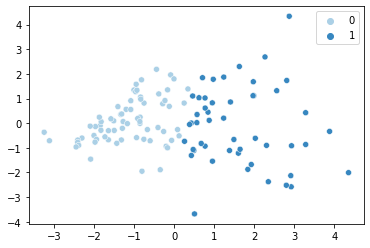

In [ ]:
sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=pred_k_means_test, palette="Blues")

Die eigentliche Verteilung der Daten:

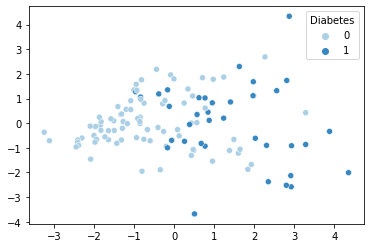

In [ ]:
sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=y_test, palette="Blues")

<hr>

## Hierarchisches Clustering
Das Hierarchische Clustering, speziell das agglomerative Clustering, kombiniert ähnliche Datenpunkte sukzessive und formt Cluster, die sich iterativ vergrößern.

<img style="float: left; width: 700px;" src="https://dashee87.github.io/images/hierarch.gif">

Wie sieht solch ein Dendrogramm in unserem Fall aus?

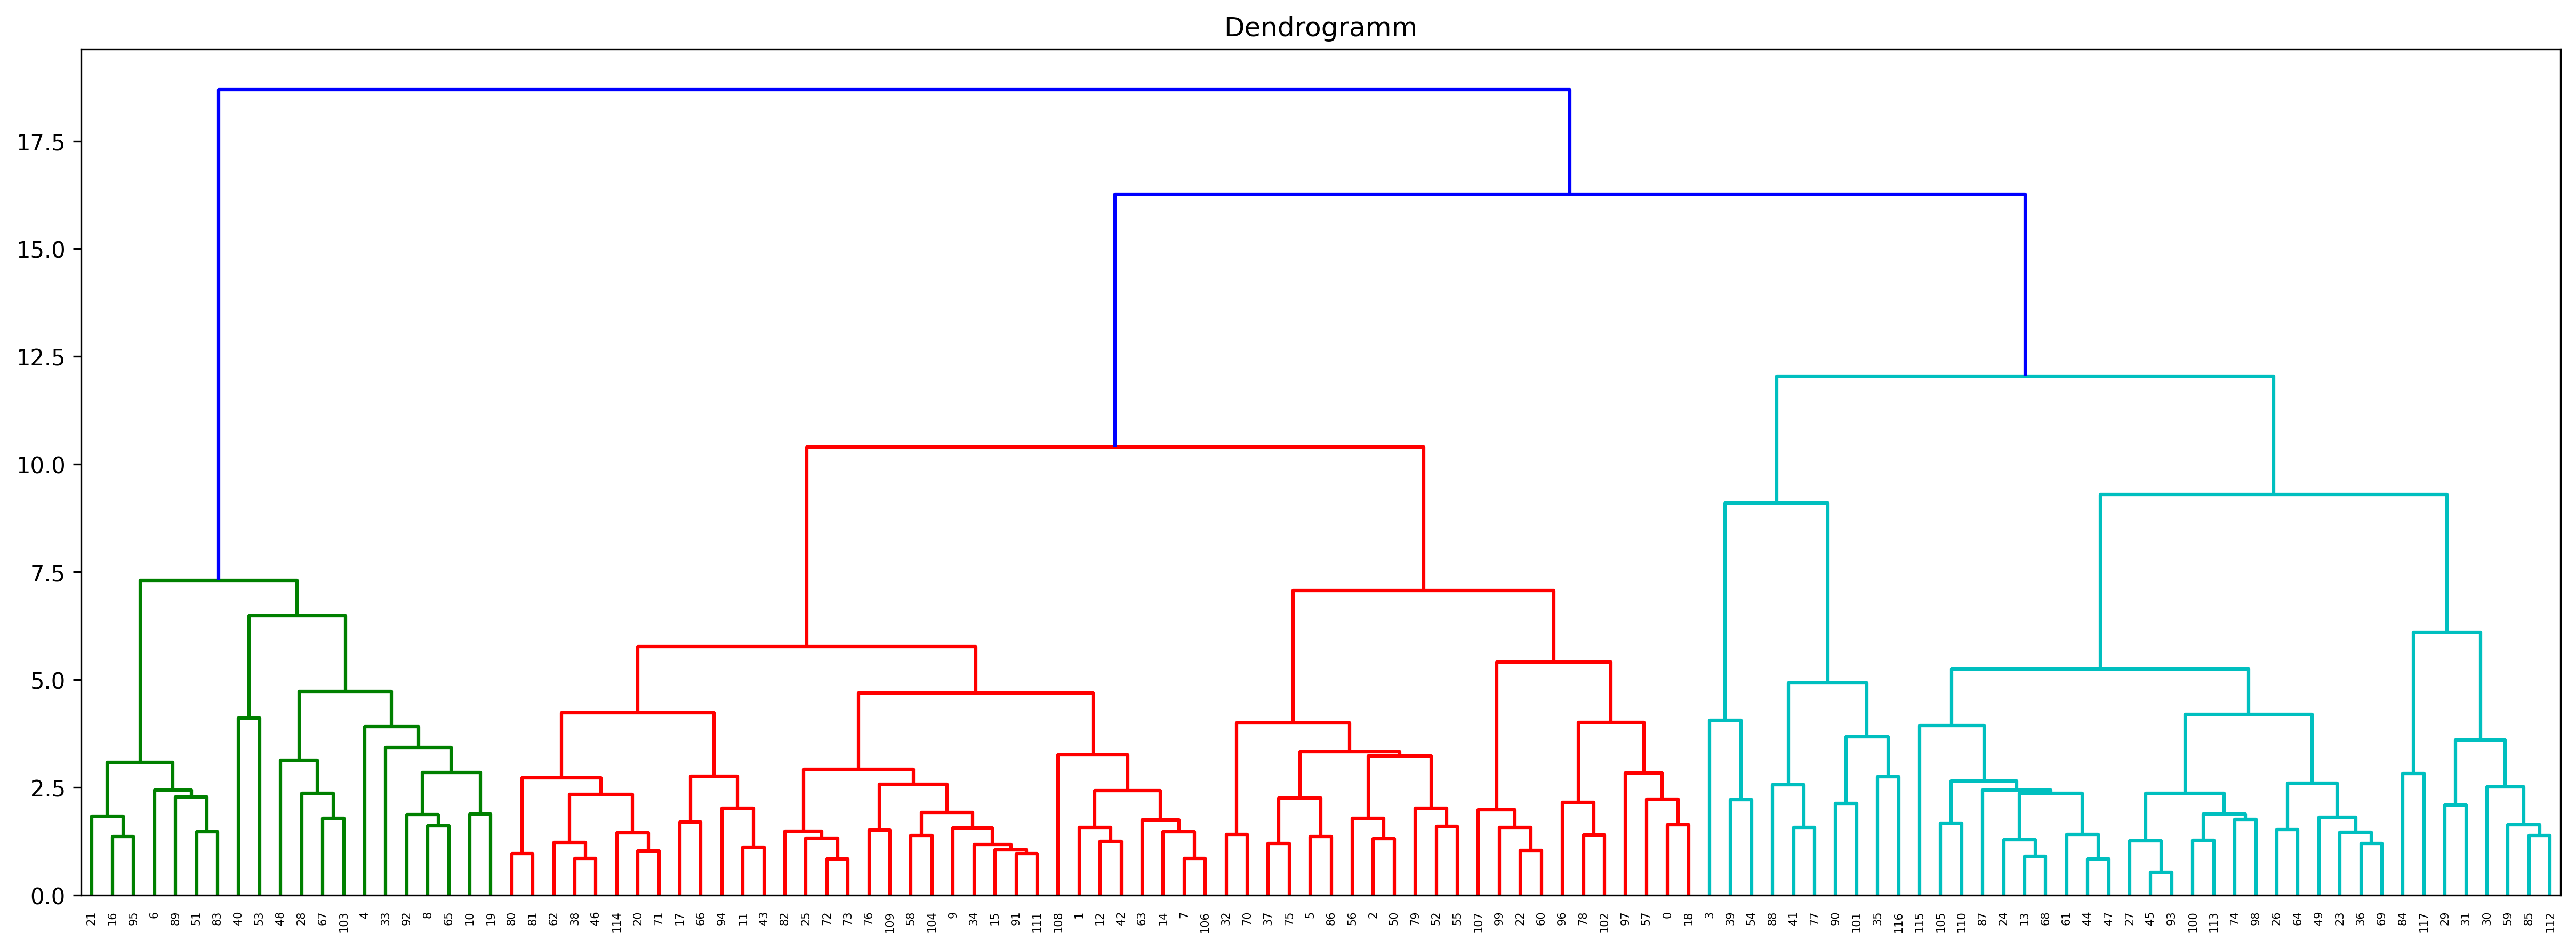

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20,7), dpi=300)
plt.title("Dendrogramm")
dend = shc.dendrogram(shc.linkage(x_test_norm, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
pred_agg_test = agg_clustering.fit_predict(x_test_norm)

Was fällt bei der Visualisierung auf?

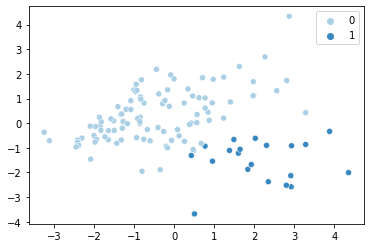

In [ ]:
sns.scatterplot(x=pc[:,0], y=pc[:, 1], hue=pred_agg_test, palette="Blues")

In [ ]:
# Wie akkurat ist unser agglomeratives Clustering?
accuracy_score(y_test, pred_agg_test)

0.7288135593220338

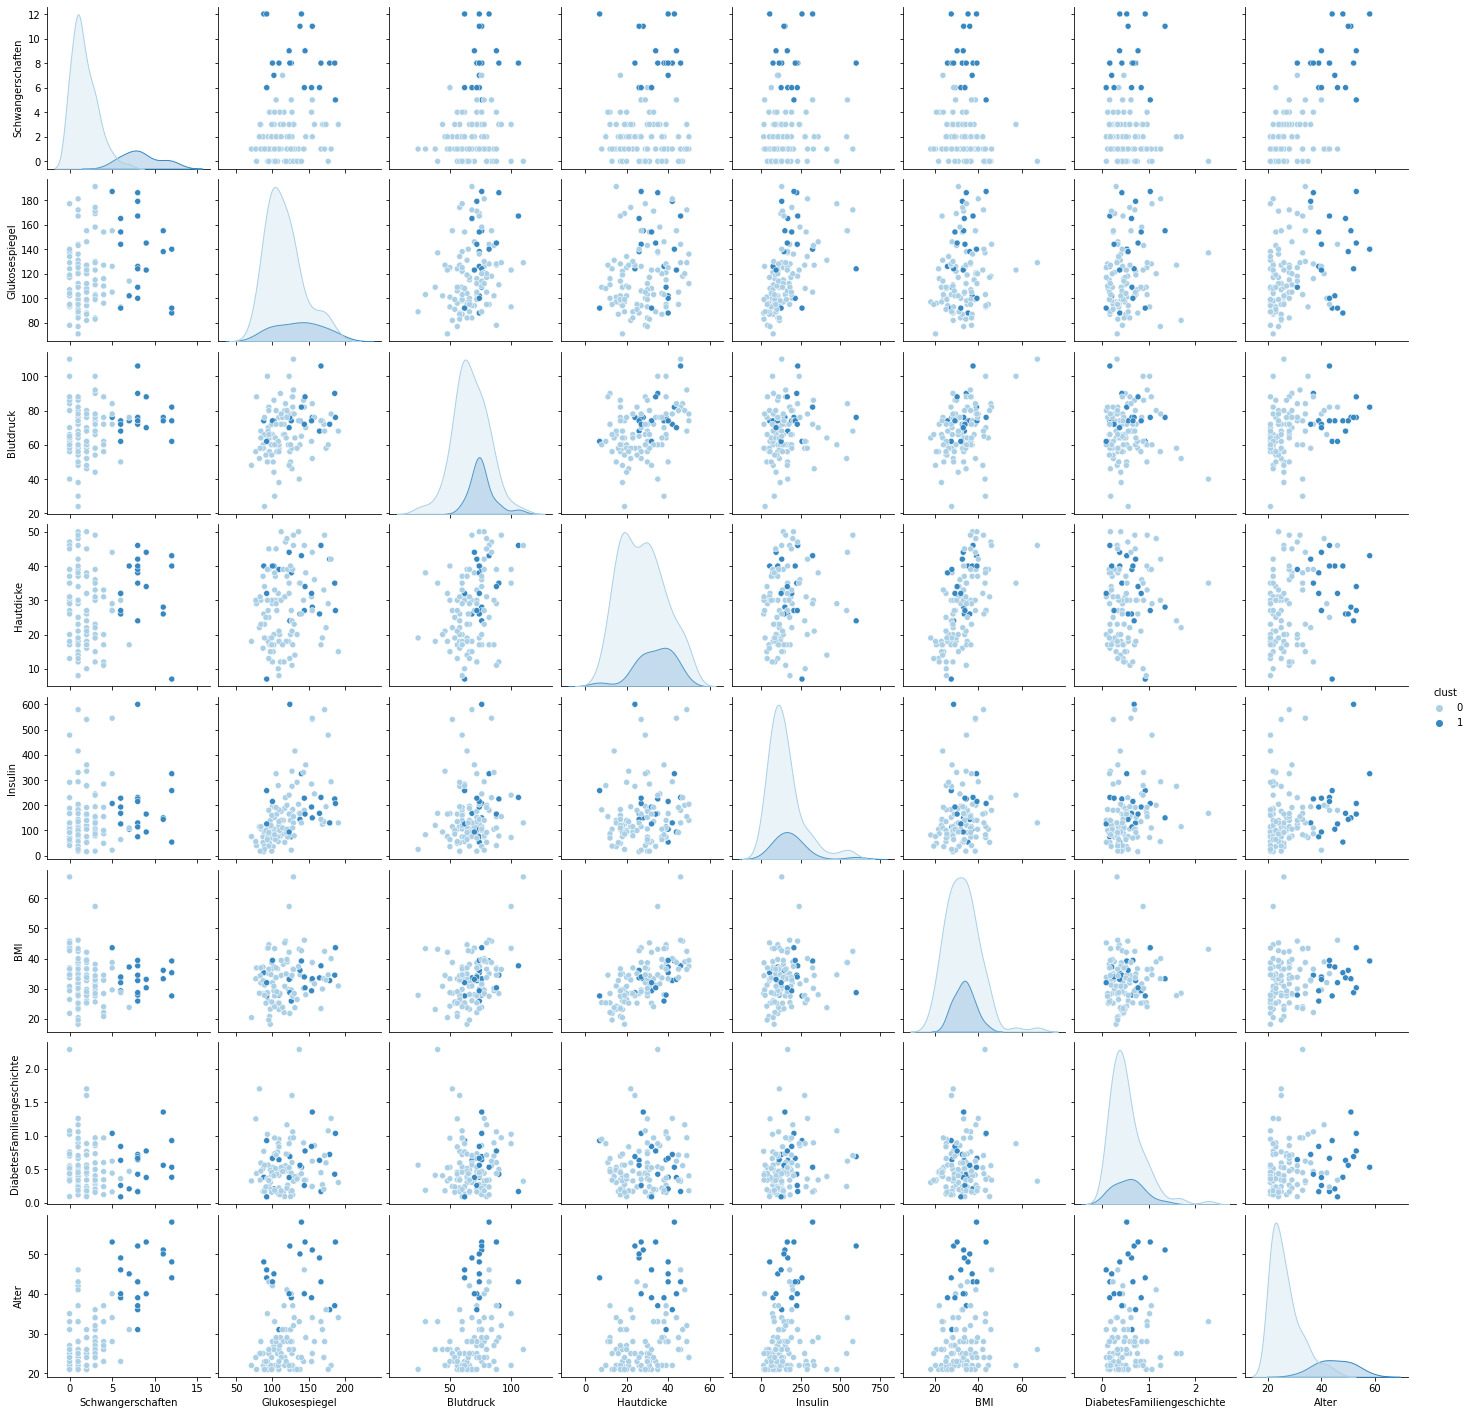

In [ ]:
# Schauen wir uns die geformten Cluster noch etwas genauer an
X_agg_values = scaler.inverse_transform(x_test_norm)
X_agg = pd.DataFrame(X_agg_values, index=x_test.index, columns=x_test.columns)
X_agg['clust'] = pred_agg_test

sns.pairplot(X_agg, hue='clust', palette='Blues')